### Load the imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nltk
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import stopwords # get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words # Get all words in english language
from nltk.stem import PorterStemmer # to reduce words to root form
from nltk import pos_tag # to get part of speech of each word

# wordcloud
from wordcloud import WordCloud

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classification report
from sklearn.metrics import classification_report

# naive bayes
from sklearn.naive_bayes import MultinomialNB
# random forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# logistic regression
from sklearn.linear_model import LogisticRegression
# SGD classifier
from sklearn.linear_model import SGDClassifier

from sklearn.decomposition import TruncatedSVD

### Read the datasets

In [10]:
dataset1 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
dataset2 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
dataset3 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")

### Read the heads of the 3 datasets.

In [11]:
dataset1.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1386694264550270000,2021-04-26,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos
1,1386694260213170000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg
2,1386694256413320000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu
3,1386694252017630000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg
4,1386694248284700000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos


In [12]:
dataset2.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1386694264550270000,2021-04-26,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos
1,1386694260213170000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg
2,1386694256413320000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu
3,1386694252017630000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg
4,1386694248284700000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos


In [13]:
dataset3.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1386694264550270000,2021-04-26,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos
1,1386694260213170000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg
2,1386694256413320000,2021-04-26,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu
3,1386694252017630000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg
4,1386694248284700000,2021-04-26,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos


### Check out the columns for the three datasets

In [14]:
print("Dataset1 columns:\n", dataset1.columns)
print("Dataset2 columns:\n", dataset2.columns)
print("Dataset3 columns:\n", dataset3.columns)

Dataset1 columns:
 Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')
Dataset2 columns:
 Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')
Dataset3 columns:
 Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')


In [56]:
from sklearn.impute import SimpleImputer

# Assuming 'dataset1' is your DataFrame
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the entire dataset to learn the most frequent values
imputer.fit(dataset1)

# Transform the entire dataset to impute missing values
dataset1_imputed = imputer.transform(dataset1)


In [57]:
# Fit the imputer on the entire dataset to learn the most frequent values
imputer.fit(dataset2)

# Transform the entire dataset to impute missing values
dataset2_imputed = imputer.transform(dataset2)


In [58]:
# Fit the imputer on the entire dataset to learn the most frequent values
imputer.fit(dataset3)

# Transform the entire dataset to impute missing values
dataset3_imputed = imputer.transform(dataset3)

### Visualize the 3 datasets.

In [59]:
# create a single dataframe called all_data

# Combine the datasets
frames = [dataset1, dataset2, dataset3]
all_data = pd.concat(frames, ignore_index=True)

all_data.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1386694264550270000,2021-04-26 00:00:00,"<a href=""http://twitter.com/download/android"" ...",RT @VP: The U.S. is working closely with the I...,en,0.0,0.0,jfd4humanrights,NaN,VP,Alabama,work close indian govern rapidli deploy addit...,0.0772,0.170,0.638,0.191,pos
1,1386694260213170000,2021-04-26 00:00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @JackPosobiec: Flip-Flop Fauci admits outdo...,en,0.0,0.0,andgrateful,NaN,JackPosobiec,NaN,flip flop fauci admit outdoor covid19 transmis...,-0.4019,0.398,0.442,0.159,neg
2,1386694256413320000,2021-04-26 00:00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @timmy315: Hi Twitter, I’m Tim Manning, the...",en,0.0,252.0,jlreader8B,NaN,timmy315,NaN,hi twitter tim man white hous covid19 suppli c...,0.0000,0.000,1.000,0.000,neu
3,1386694252017630000,2021-04-26 00:00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itsaadee: Praying for #India as the countr...,en,0.0,2.0,ijennychauhan,"India, Covid",itsaadee,NaN,pray countri battl worst surg world wit let ir...,-0.4215,0.306,0.522,0.172,neg
4,1386694248284700000,2021-04-26 00:00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rapid Investment in Nursing to Strengthen the ...,en,0.0,7937.0,IJNSJournal,NaN,NaN,UK,rapid invest nurs strengthen global covid19 re...,0.3182,0.000,0.723,0.277,pos


In [60]:
all_data.tail()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
442420,1409140000000000000,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Just as the northern hemisphere summer season ...,en,0.0,0.0,jmhamiltonblog,NaN,NaN,🇨🇦🇺🇸🏳️‍🌈,northern hemispher summer season kick european...,0.0000,0.000,1.000,0.000,neu
442421,1409140000000000000,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofo...",COVID 19 TRENDS 2020-2021 https://t.co/tjKMaht...,en,0.0,0.0,CochingcoA,NaN,YouTube,"Airport Heights Campus, NUST.",covid19 trend via,0.0000,0.000,1.000,0.000,neu
442422,1409130000000000000,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Goal is reached: 40 per cent of Chinese get Co...,en,0.0,0.0,DavidGr07837209,NaN,SCMPNews,"Melbourne, Victoria, Australia",goal reach per cent chines get covid19 jab end...,0.0258,0.000,0.901,0.099,pos
442423,1409130000000000000,2021-06-27,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Covid-19 and Uganda’s looming political crisis...,en,0.0,0.0,JOBBWIRE,NaN,NaN,"Kampala, Uganda",covid19 uganda loom polit crisi,-0.2263,0.322,0.678,0.000,neg
442424,1409130000000000000,2021-06-27,"<a href=""http://twitter.com/download/iphone"" r...","RT @MirzaNasara: Alhamdolillah, we got our sec...",en,0.0,221.0,Life_Devotee,NaN,MirzaNasara,قائدتحریک جدید۔تربیت ۔اشاعت,alhamdolillah got second dose covid19 vaccin m...,0.4404,0.000,0.805,0.195,pos


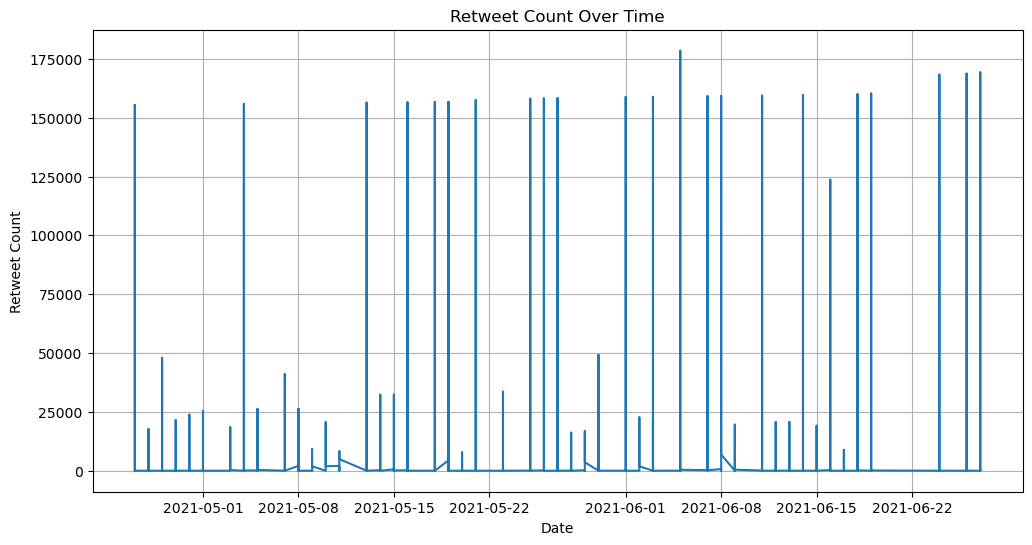

In [61]:
# Time Series Line Plot for Retweet Count
dataset1['created_at'] = pd.to_datetime(dataset1['created_at'])
plt.figure(figsize=(12, 6))
plt.plot(dataset1['created_at'], dataset1['retweet_count'])
plt.title('Retweet Count Over Time')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.show()

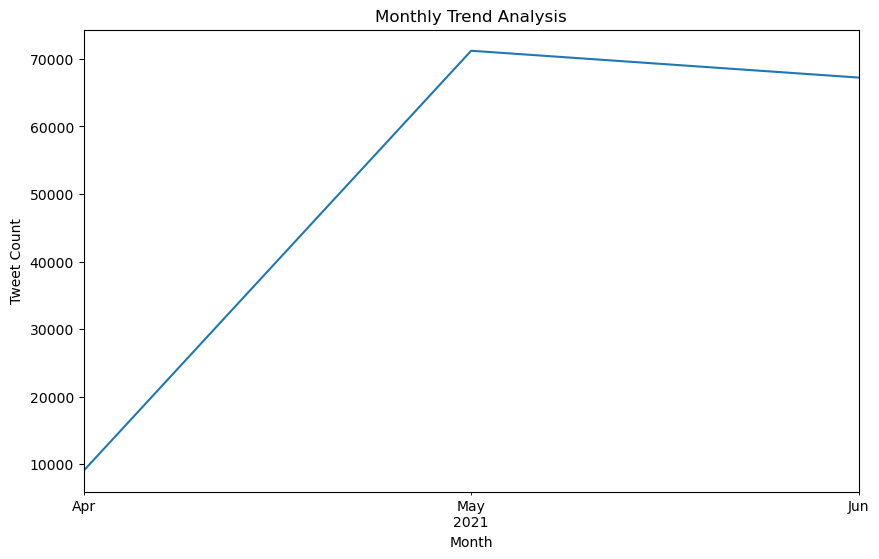

In [95]:
# Monthly Trending Analysis
#Load the data from CSV file
dataset1 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
dataset2 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
dataset3 = pd.read_csv(r"Covid-19 Twitter Dataset (Apr-Jun 2021).csv")

# Convert the 'created_at' column to datetime format
dataset1['created_at'] = pd.to_datetime(dataset1['created_at'])
dataset2['created_at'] = pd.to_datetime(dataset2['created_at'])
dataset3['created_at'] = pd.to_datetime(dataset3['created_at'])

# Set the 'created_at' column as the index
dataset1.set_index('created_at', inplace=True)
dataset2.set_index('created_at', inplace=True)
dataset3.set_index('created_at', inplace=True)

# Resample the data to a specific time frequency (e.g., daily, weekly, monthly)
# Here, we'll resample the data to a monthly frequency
monthly_data = dataset1.resample('M').size()
monthly_data = dataset2.resample('M').size()
monthly_data = dataset3.resample('M').size()

# Plot the trend
monthly_data.plot(figsize=(10, 6))
plt.title('Monthly Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.show()


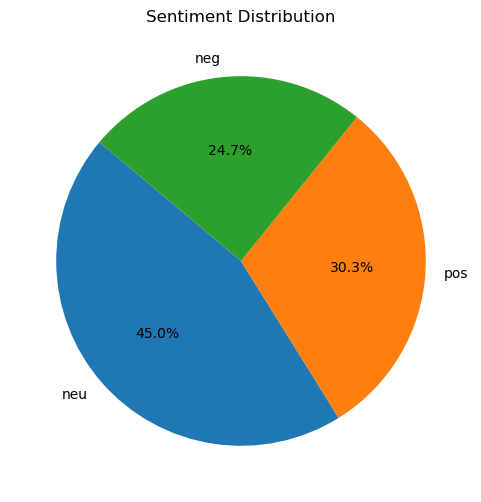

In [62]:
# Pie Chart for Sentiment Distribution
sentiment_counts = all_data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

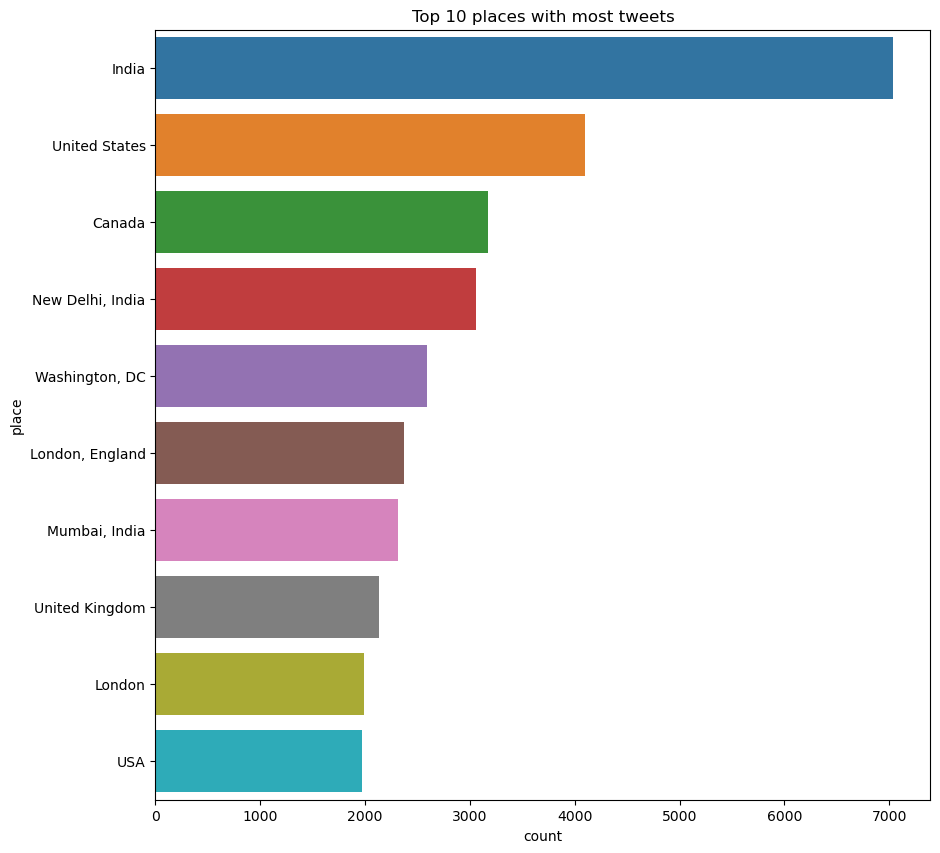

In [63]:
# plot which all_data['place'] has the most tweets
plt.figure(figsize=(10, 10))

sns.countplot(y='place', data=all_data, order=all_data['place'].value_counts().iloc[:10].index)

plt.title('Top 10 places with most tweets')

plt.show()

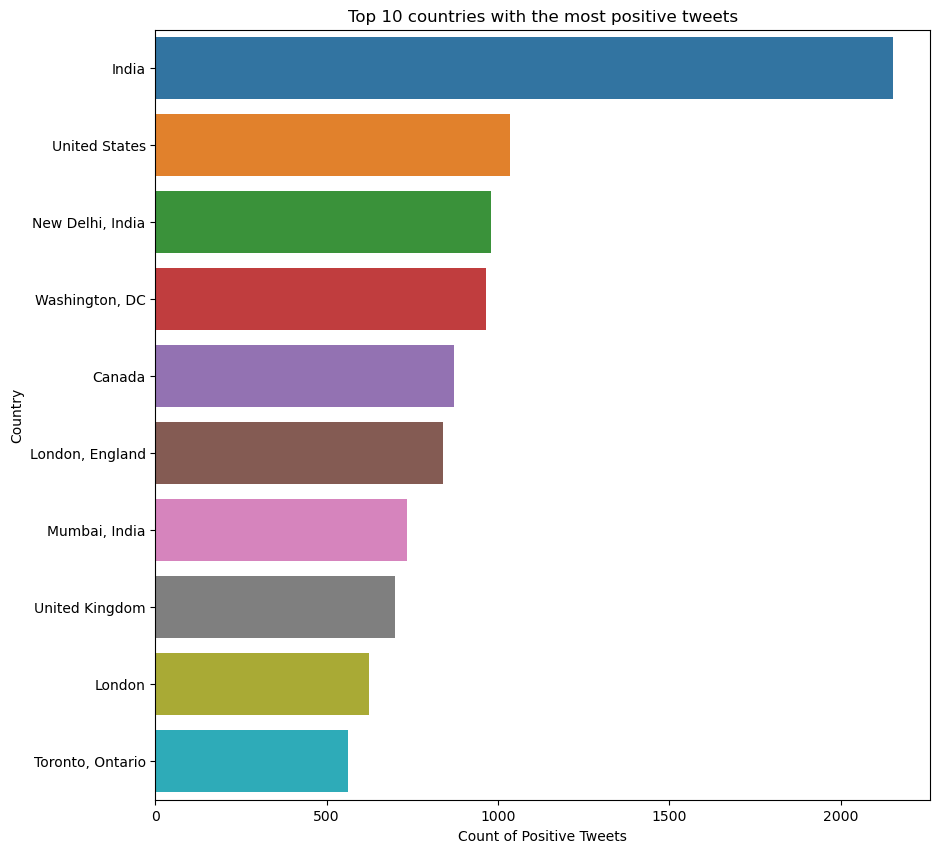

In [23]:
# Filter the data for positive sentiment tweets
positive_tweets = all_data[all_data['sentiment'] == 'pos']

# Create a count plot for the top 10 countries with the most positive tweets
plt.figure(figsize=(10, 10))
sns.countplot(y='place', data=positive_tweets, order=positive_tweets['place'].value_counts().iloc[:10].index)
plt.title('Top 10 countries with the most positive tweets')
plt.xlabel('Count of Positive Tweets')
plt.ylabel('Country')
plt.show()


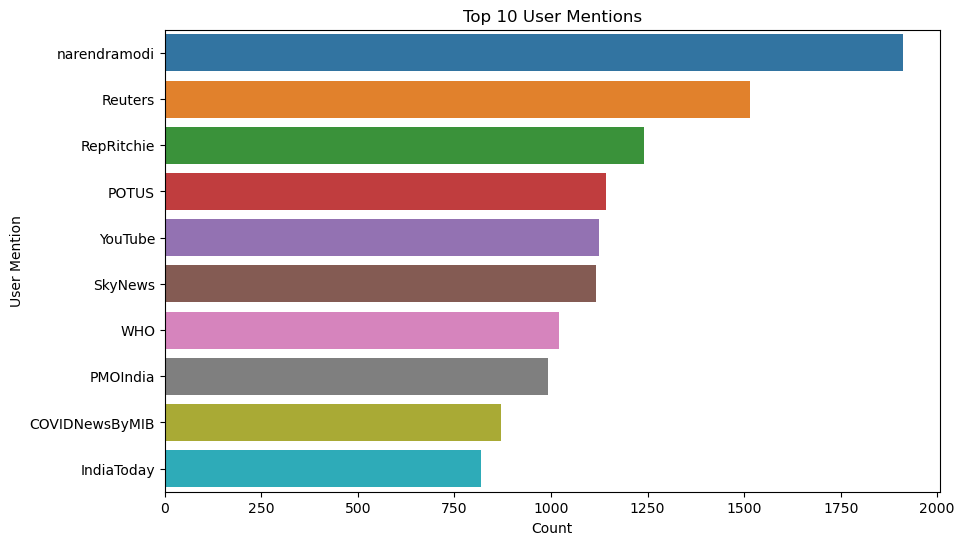

In [24]:
top_user_mentions = all_data['user_mentions'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_user_mentions.values, y=top_user_mentions.index)
plt.title('Top 10 User Mentions')
plt.xlabel('Count')
plt.ylabel('User Mention')
plt.show()

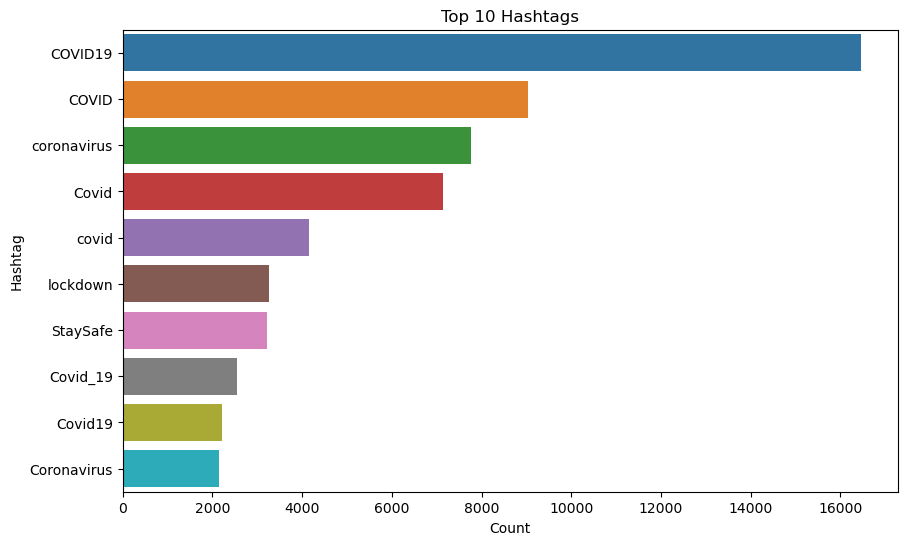

In [25]:
top_hashtags = all_data['hashtags'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
plt.title('Top 10 Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

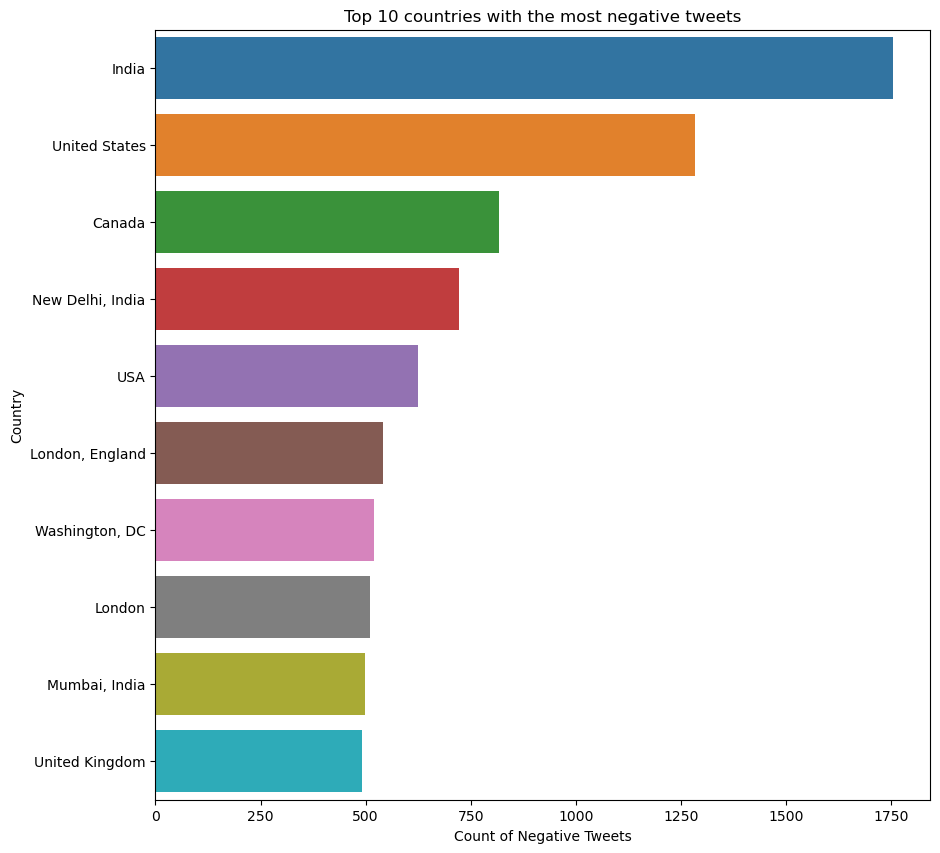

In [26]:
# Filter the data for negative sentiment tweets
negative_tweets = all_data[all_data['sentiment'] == 'neg']

# Create a count plot for the top 10 countries with the most negative tweets
plt.figure(figsize=(10, 10))
sns.countplot(y='place', data=negative_tweets, order=negative_tweets['place'].value_counts().iloc[:10].index)
plt.title('Top 10 countries with the most negative tweets')
plt.xlabel('Count of Negative Tweets')
plt.ylabel('Country')
plt.show()


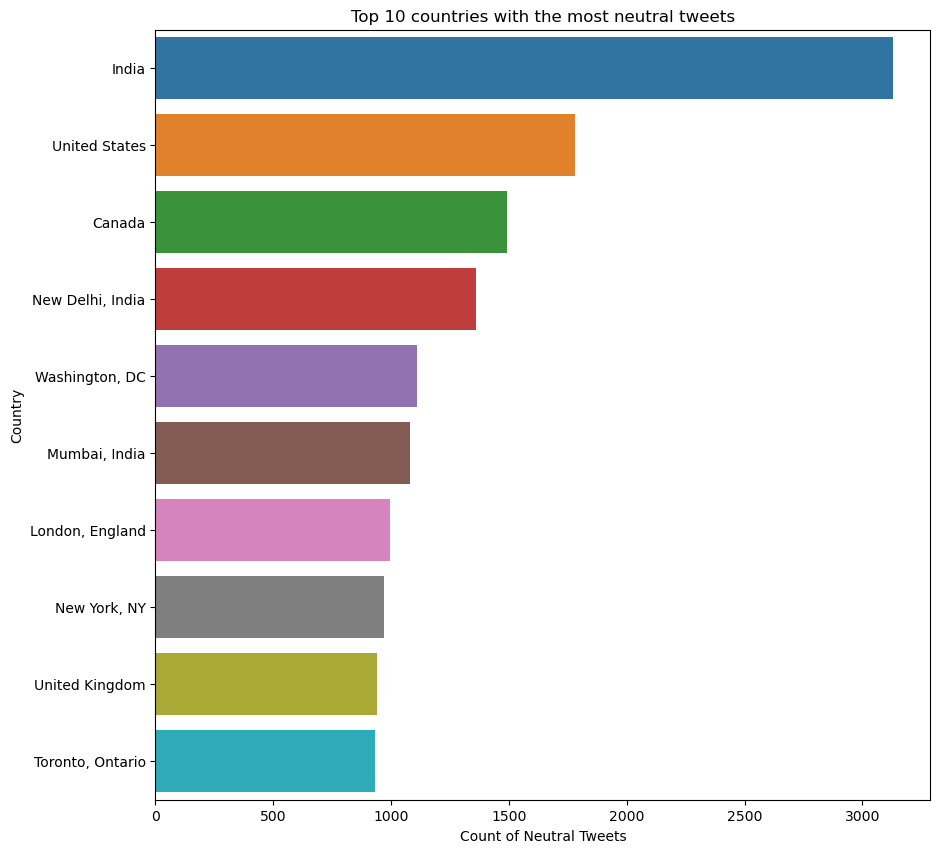

In [27]:
# Filter the data for neutral sentiment tweets
neutral_tweets = all_data[all_data['sentiment'] == 'neu']

# Create a count plot for the top 10 countries with the most neutral tweets
plt.figure(figsize=(10, 10))
sns.countplot(y='place', data=neutral_tweets, order=neutral_tweets['place'].value_counts().iloc[:10].index)
plt.title('Top 10 countries with the most neutral tweets')
plt.xlabel('Count of Neutral Tweets')
plt.ylabel('Country')
plt.show()

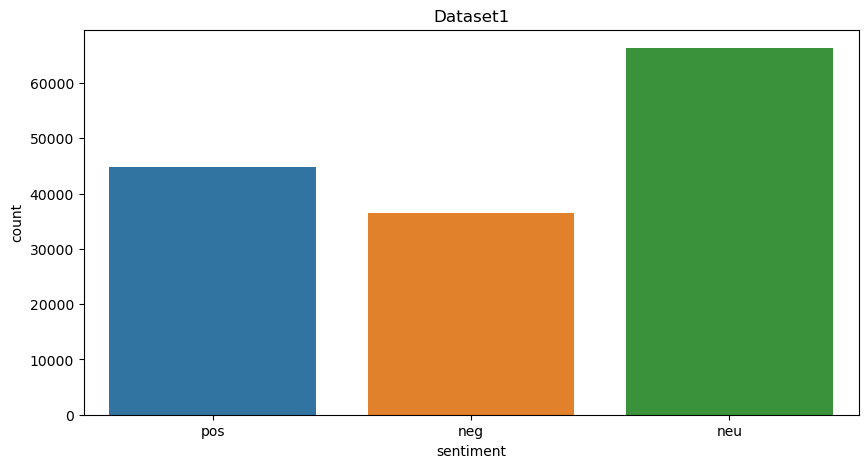

In [28]:
# Visualizing the datasets

# Dataset1
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=dataset1)
plt.title('Dataset1')
plt.show()


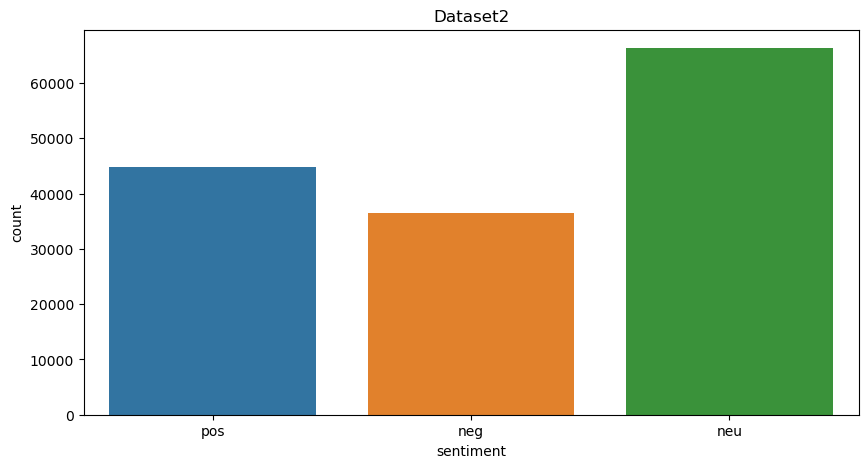

In [29]:
# Dataset2

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=dataset2)
plt.title('Dataset2')
plt.show()

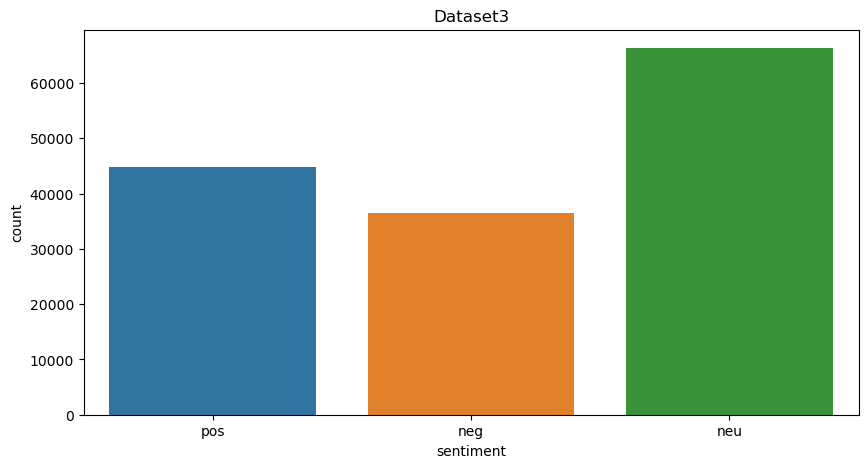

In [33]:
# Dataset3

plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=dataset3)
plt.title('Dataset3')
plt.show()

### Create wordclouds for the three datasets.

In [46]:
all_data['clean_tweet']

0          work close indian govern rapidli deploy addit...
1         flip flop fauci admit outdoor covid19 transmis...
2         hi twitter tim man white hous covid19 suppli c...
3         pray countri battl worst surg world wit let ir...
4         rapid invest nurs strengthen global covid19 re...
                                ...                        
442420    northern hemispher summer season kick european...
442421                                    covid19 trend via
442422    goal reach per cent chines get covid19 jab end...
442423                      covid19 uganda loom polit crisi
442424    alhamdolillah got second dose covid19 vaccin m...
Name: clean_tweet, Length: 442425, dtype: object

In [98]:
from textblob import TextBlob

all_data['clean_tweet'] = all_data['clean_tweet'].astype(str)

# Function to preprocess text
def preprocess_text(text):
    # Add your text preprocessing steps here
    # For example, you can remove special characters and convert to lowercase
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply preprocessing to the 'clean_tweet' column
all_data['clean_tweet'] = all_data['clean_tweet'].apply(preprocess_text)

# Apply sentiment analysis
all_data['sentiment_score'] = all_data['clean_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
all_data['sentiment'] = all_data['sentiment_score'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))


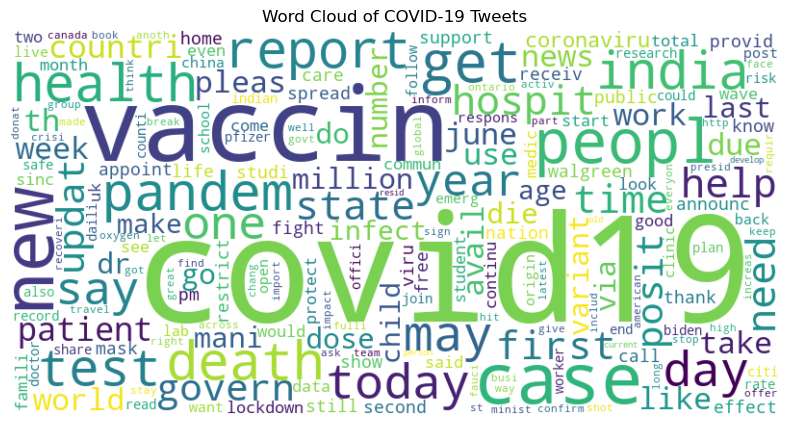

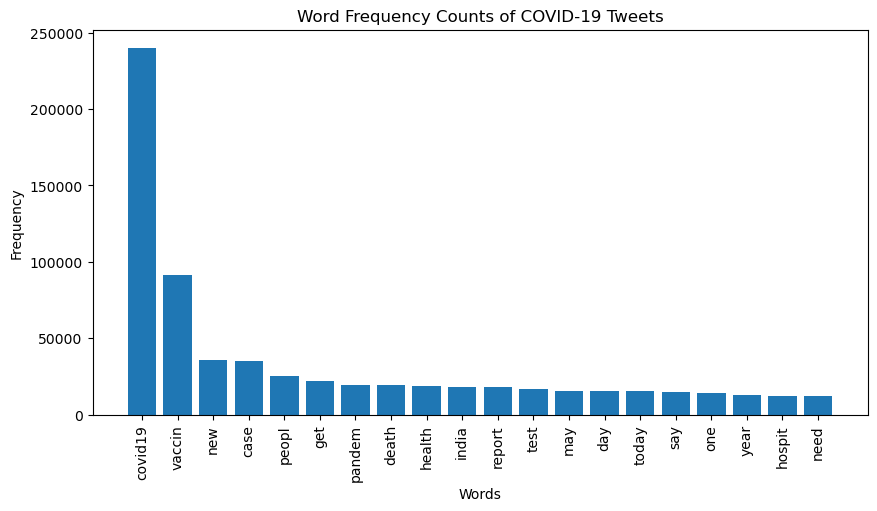

In [100]:
# Assuming 'all_data' contains your COVID-19 tweet data and 'clean_tweet' is the preprocessed text column
text = ' '.join(all_data['clean_tweet'])

# Calculate word frequency using Counter
from collections import Counter
word_freq = Counter(text.split())

# Create a WordCloud based on word frequency
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of COVID-19 Tweets')

# Optional: Display word frequency counts as a bar chart
plt.figure(figsize=(10, 5))
most_common_words = word_freq.most_common(20)  # Display the top 20 most common words
words, frequencies = zip(*most_common_words)
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Counts of COVID-19 Tweets')
plt.xticks(rotation=90)
plt.show()


### Data preprocessing

Preprocess the data for natural language processing (NLP), remove the stop words, convert the text to lowercase, stem it, and tokenize it.

In [87]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

# Apply preprocessing to each clean_tweet
all_data['processed_tweet'] = all_data['clean_tweet'].astype(str).apply(preprocess_text)

# Display the processed data
print(all_data['processed_tweet'].head())


0    [work, close, indian, govern, rapidli, deploy,...
1    [flip, flop, fauci, admit, outdoor, covid19, t...
2    [hi, twitter, tim, man, white, hou, covid19, s...
3    [pray, countri, battl, worst, surg, world, wit...
4    [rapid, invest, nur, strengthen, global, covid...
Name: processed_tweet, dtype: object


### Machine learning models

Construction of machine learning models, including Naive Bayes, Random Forest, SGDClassifiers, SVM and Logistic Regression.

In [88]:
# Convert tokenized and preprocessed tweets back to string
all_data['processed_tweet_str'] = all_data['processed_tweet'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(all_data['processed_tweet_str'])

y = all_data['sentiment']


### Splitting the Dataset and defining the Models

In [89]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the models
models = {
    "Naive Bayes": MultinomialNB(),
    "SGDClassifier": SGDClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # "Random Forest": RandomForestClassifier(),
    # "SVM": SVC(),
}



### First Code Evaluation

In [90]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------")

Model: Naive Bayes
              precision    recall  f1-score   support

         neg       0.88      0.82      0.85     21964
         neu       0.94      0.95      0.94     39675
         pos       0.86      0.89      0.87     26846

    accuracy                           0.90     88485
   macro avg       0.89      0.89      0.89     88485
weighted avg       0.90      0.90      0.90     88485

-------------------------------------------------------------
Model: SGDClassifier
              precision    recall  f1-score   support

         neg       0.96      0.80      0.87     21964
         neu       0.87      1.00      0.93     39675
         pos       0.95      0.87      0.91     26846

    accuracy                           0.91     88485
   macro avg       0.93      0.89      0.90     88485
weighted avg       0.92      0.91      0.91     88485

-------------------------------------------------------------
Model: Logistic Regression
              precision    recall  f1-score   s